### Send Function in LangGraph
The Send function allows you to specify the target node and the message (data or state) to pass along. It’s designed to streamline communication between nodes in a graph. The Send function is essential for orchestrating data flow in LangGraph.

The Send function simplifies complex workflows by:
* Dynamically routing data between nodes.
* Supporting parallel processing for tasks like batch operations.
* Keeping your workflow modular and easy to debug.

Send(target_node: str, message: dict)
* target_node: The name of the node receiving the message.
* message: A dictionary containing the state or data to be sent.

In [1]:
from typing import TypedDict, Annotated
import operator

class OverallState(TypedDict):
    subjects: list[str]
    jokes: Annotated[list[str], operator.add]  # Fixed indentation
    final_joke: str


In [8]:
import time
from langgraph.constants import Send

def continue_to_jokes(state: OverallState):
    return [Send("generate_joke", {"subject": s}) for s in state['subjects']]

def generate_joke(state: OverallState):
    subject = state['subject']
    print(f"Generating joke for subject: {subject}")
    print("===========================================")
    joke = f"Why did the {subject} cross the road? To get to the other side!"
    time.sleep(5)
    print(f"Done with time for {subject}")
    return {"jokes": [joke]}

def best_joke(state: OverallState):
    jokes = state['jokes']
    print(f"Printing jokes: {jokes}")
    return {"final_joke": jokes[-1]}

/var/folders/wp/9w_2m0xn5clfmrkfxjxl7cm00000gn/T/ipykernel_86268/3310965093.py:2: LangGraphDeprecatedSinceV10: Importing Send from langgraph.constants is deprecated. Please use 'from langgraph.types import Send' instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  from langgraph.constants import Send


In [10]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(OverallState)
builder.add_node("continue_to_jokes", continue_to_jokes)
builder.add_node("generate_joke", generate_joke)
builder.add_node("best_joke", best_joke)
builder.add_conditional_edges(START, continue_to_jokes)
builder.add_edge("generate_joke", "best_joke")
builder.add_edge("best_joke", END)
app = builder.compile()


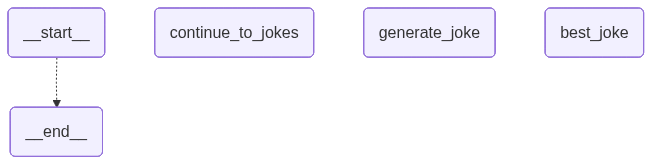

In [11]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
initial_state = {"subjects": ["chicken", "cow", "goat", "elephant", "tiger"]}
result = app.invoke(initial_state)
print(result)

Generating joke for subject: chicken
Generating joke for subject: cow
Generating joke for subject: goat
Generating joke for subject: elephant
Generating joke for subject: tiger
Done with time for chickenDone with time for cow
Done with time for goat

Done with time for tiger
Done with time for elephant
Printing jokes: ['Why did the chicken cross the road? To get to the other side!', 'Why did the cow cross the road? To get to the other side!', 'Why did the goat cross the road? To get to the other side!', 'Why did the elephant cross the road? To get to the other side!', 'Why did the tiger cross the road? To get to the other side!']
{'subjects': ['chicken', 'cow', 'goat', 'elephant', 'tiger'], 'jokes': ['Why did the chicken cross the road? To get to the other side!', 'Why did the cow cross the road? To get to the other side!', 'Why did the goat cross the road? To get to the other side!', 'Why did the elephant cross the road? To get to the other side!', 'Why did the tiger cross the road? T

{'subjects': ['chicken', 'cow'], 
'jokes': ['Why did the chicken cross the road? To get to the other side!', 'Why did the cow cross the road? To get to the other side!']}